<a href="https://colab.research.google.com/github/richardcmg7/sistemascognitivos/blob/main/Actividad_1_Parte_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# UNIR - SISTEMAS COGNITIVOS


> ### RICHARD CAMILO SAAVEDRA CONEO
> #### Actividad 1 - Entrenamiento de Redes Neuronales


# Primera parte: Introducción a las redes neuronales con Keras

En esta primera parte, vamos a utilizar una red neuronal para clasificar imágenes de prendas de ropa. Para ello, utilizaremos Keras con TensorFlow.

El dataset a utilizar es Fashion MNIST, un problema sencillo con imágenes pequeñas de ropa, pero más interesante que el dataset de MNIST. Puedes consultar más información sobre el dataset en [este enlace](https://github.com/zalandoresearch/fashion-mnist).

El código utilizado para contestar tiene que quedar claramente reflejado en el Notebook. Puedes crear nuevas cells si así lo deseas para estructurar tu código y sus salidas. A la hora de entregar el notebook, **asegúrate de que los resultados de ejecutar tu código han quedado guardados** (por ejemplo, a la hora de entrenar una red neuronal tiene que verse claramente un log de los resultados de cada epoch).

In [ ]:
import keras
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf
import numpy as np


import matplotlib.pyplot as plt

Primero, vamos a obtener los datos. Por suerte para nosotros, estos pueden ser descargados directamente desde Keras, por lo que no tendremos que preocuparnos de tratar con ficheros.

In [ ]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


Acto seguido, normalizamos esos datos de manera similar a como hemos visto con MNIST, obteniendo valores entre 0 y 1. Este paso es muy importante para el correcto funcionamiento de nuestra red.

In [ ]:
x_train = x_train / 255.0
x_test = x_test / 255.0

## 1. Información sobre el dataset

Una vez tenemos los datos cargados en memoria, vamos a obtener información sobre los mismos.

**Pregunta 1.1 *(0.25 puntos)*** ¿Cuántas imágenes hay de *training* y de *test*? ¿Qué tamaño tienen las imágenes?

In [ ]:
### Tu código aquí ###
print(f"La cantidad de imágenes de entrenamiento es de {len(x_train)}")
print(f"La cantidad de imágenes para test es de {len(x_test)}")
print(f"El tamaño de las imagenes de de {x_test[0].shape[0]} X {x_test[0].shape[1]}")
print(f"El tipo de datos de la variable de entrenamiento \"x_train\" es {type(x_test)}")

La cantidad de imágenes de entrenamiento es de 60000
La cantidad de imágenes para test es de 10000
El tamaño de las imagenes de de 28 X 28
El tipo de datos de la variable de entrenamiento "x_train" es <class 'numpy.ndarray'>


*Tu respuesta aquí*

x_train y x_test son del tipo numpy array

* La cantidad de imágenes de entrenamiento es de 60000
* La cantidad de imágenes para test es de 10000
* El tamaño de las imagenes de de 28 X 28

**Pregunta 1.2 *(0.25 puntos)*** Realizar una exploración de las variables que contienen los datos. Describir en qué consiste un example del dataset (qué información se guarda en cada imagen) y describir qué contiene la información en y.

In [ ]:
### Tu código aquí ###
print(f"El set de datos x_train es {x_train.shape}")
print(f"El set de datos y_train es {y_train.shape}")
print(f"el set de datos de y contiene los siguientes valores unicos {set(y_train)}")
print(" Los cuales corresponden a la categoria de una imagen")

El set de datos x_train es (60000, 28, 28)
El set de datos y_train es (60000,)
el set de datos de y contiene los siguientes valores unicos {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
 Los cuales corresponden a la categoria de una imagen


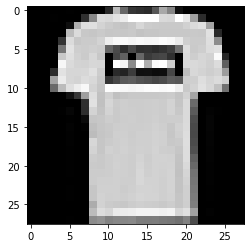

In [ ]:
x_train[0]
plt.imshow(x_train[1], cmap="gray")

*Tu respuesta aquí*

Describir en qué consiste un example del dataset?
<p>
Un example de dataset de entrenamiento esta compuesto por un valor entero de información de cada uno de los pixeles normalizado (0 - 1) organizado en un arreglo numpy de 28 x 28.</p>
<p>
el set de datos de y contiene los siguientes valores unicos {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
 Los cuales corresponden a la categoria de una imagen
</p>
<table>
        <th>Label</th><th>Description</th>
    <tr>
        <td>0</td><td>T-shirt/top</td>
    </tr>
    <tr><td>1</td><td>	Trouser </td></tr>
    <tr><td>2</td><td>	Pullover </td></tr>
    <tr><td>3</td><td>	Dress </td>
    </tr>
    <tr><td>4</td><td>	Coat </td></tr>
    <tr><td>5</td><td>	Sandal </td></tr>
    <tr><td>6</td><td>	Shirt </td>
    </tr>
    <tr><td>7</td><td>	Sneaker </td></tr>
    <tr><td>8</td><td>	Bag</td></tr>
    <tr><td>9</td><td>	Ankle boot </td></tr>
</table>

Vamos a **visualizar** una imagen de ejemplo. Prueba tu mismo a cambiar la imagen en uso para explorar el dataset visualmente ejecutando el siguiente código:

In [ ]:
def visualize_example(x):
    plt.figure()
    plt.imshow(x)
    plt.colorbar()
    plt.grid(False)
    plt.show()

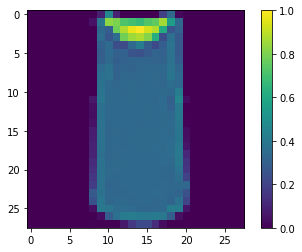

In [ ]:
visualize_example(x_train[2])

## 2. Entrenamiento de una red neuronal simple

**Pregunta 2 *(3.5 puntos)***. Utilizando Keras, y preparando los datos de X e y como fuera necesario, define y entrena una red neuronal que sea capaz de clasificar imágenes de Fashion MNIST con las siguientes características:

* Dos hidden layers de tamaños 128 y 64, utilizando unidades **sigmoid**
* Optimizador **sgd**.
* Durante el entrenamiento, la red tiene que mostrar resultados de **loss** y **accuracy** por cada epoch.
* La red debe entrenar durante **20 epochs** y batch size de **64**.
* La última capa debe de ser una capa **softmax**.

Tu red tendría que ser capaz de superar fácilmente 60% de accuracy.

In [ ]:
x_train_full = x_train 

In [ ]:
X_valid, X_train = x_train_full[:5000], x_train_full[5000:]
y_valid, y_train = y_train[:5000], y_train[5000:]

In [ ]:
### Tu código aquí ###

model= keras.models.Sequential()
# El tamaño de entrada  corresponde al tamaño de la imagen 28x28
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(128, activation="sigmoid"))
model.add(keras.layers.Dense(64, activation="sigmoid"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                650       
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer= "sgd",
              metrics =["accuracy"])

In [ ]:
history = model.fit(X_train,y_train,
                    batch_size=64,
                    epochs=20, 
                    validation_data=(X_valid, y_valid))

Epoch 1/20
860/860 [==============================] - 2s 2ms/step - loss: 2.1840 - accuracy: 0.3947 - val_loss: 2.0154 - val_accuracy: 0.5946
Epoch 2/20
860/860 [==============================] - 2s 2ms/step - loss: 1.8167 - accuracy: 0.5819 - val_loss: 1.6182 - val_accuracy: 0.6458
Epoch 3/20
860/860 [==============================] - 2s 2ms/step - loss: 1.4855 - accuracy: 0.6369 - val_loss: 1.3475 - val_accuracy: 0.6568
Epoch 4/20
860/860 [==============================] - 2s 2ms/step - loss: 1.2621 - accuracy: 0.6591 - val_loss: 1.1639 - val_accuracy: 0.6870
Epoch 5/20
860/860 [==============================] - 2s 2ms/step - loss: 1.1094 - accuracy: 0.6818 - val_loss: 1.0373 - val_accuracy: 0.6992
Epoch 6/20
860/860 [==============================] - 2s 2ms/step - loss: 0.9991 - accuracy: 0.6949 - val_loss: 0.9432 - val_accuracy: 0.7154
Epoch 7/20
860/860 [==============================] - 2s 2ms/step - loss: 0.9152 - accuracy: 0.7106 - val_loss: 0.8693 - val_accuracy: 0.7294
Epoch 

Text(0.5, 1.0, 'Perdida en entrenamiento y validación')

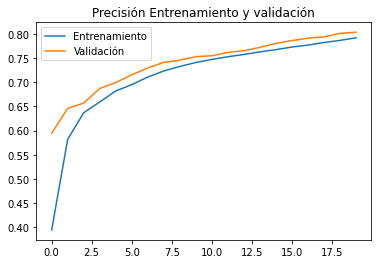

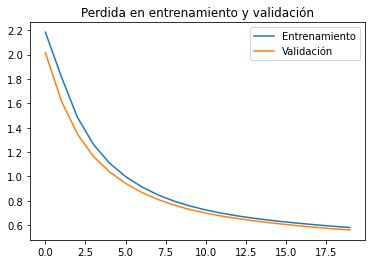

In [ ]:
#-----------------------------------------------------------
# Recupera la los resultado sobre los datos de entrenamiento y test
# para cada epoca de entrenamiento
#-----------------------------------------------------------
acc      = history.history[ 'accuracy' ]
val_acc  = history.history[ 'val_accuracy' ]
loss     = history.history[ 'loss' ]
val_loss = history.history[ 'val_loss' ]

epochs   = range(len(acc)) # Obtiene el número de epocas

#------------------------------------------------
# Gráfica de precisión de entrenamiento y validación por  epoch
#------------------------------------------------
plt.plot  ( epochs,     acc, label='Entrenamiento')
plt.plot  ( epochs, val_acc, label='Validación')
plt.title ('Precisión Entrenamiento y validación')
plt.legend()
plt.figure()

#------------------------------------------------
# Grafica de perdida (loss) entrenamiento y validación por epoca
#------------------------------------------------
plt.plot  ( epochs,     loss, label='Entrenamiento')
plt.plot  ( epochs, val_loss, label='Validación')
plt.legend()
plt.title ('Perdida en entrenamiento y validación')

In [ ]:
# Guardamos el modelo entrenado como Keras HDF5 

saved_model_path = "./model.h5"
model.save('model_fmnist.h5')

## 3. Evaluación del modelo en datos de test

Una vez hemos entrenado nuestro modelo, vamos a evaluarlo en los datos de test de Fashion MNIST.

**Pregunta 3.1 *(0.5 puntos)***. Utilizando el modelo recién entrenado, obtener la accuracy resultante en el dataset de test.

In [ ]:
### Tu código aquí ###
# Evaluando los datos de Test obtenemos
print("Evaluando el modelo con los datos de Test: ")
resultado = model.evaluate(x_test, y_test, batch_size=128)
print("Perdida datos de Test, Precisión Datos de test:", resultado)
print("***********************************************************")
print(f"La presición de los datos de test es de: {resultado[1]}")
                   

Evaluando el modelo con los datos de Test: 
79/79 [==============================] - 0s 2ms/step - loss: 0.5930 - accuracy: 0.7832
Perdida datos de Test, Precisión Datos de test: [0.5929639935493469, 0.7832000255584717]
***********************************************************
La presición de los datos de test es de: 0.7832000255584717


**Pregunta 3.2 *(0.5 puntos)***. Utilizando el método **predict** de Keras, realizar predicciones para los datos de test. Por cada predicción resultante, ¿qué significan los números que obtenemos al hacer predict? ¿Cómo podemos obtener el valor de la clase resultante? (recordar que estamos utilizando una capa softmax para clasificar).

In [ ]:
### Tu código aquí ###
from sklearn.metrics import accuracy_score
predictions = model.predict(x_test)     
print(f"El resultado de la predicción esta formado por {predictions.shape[0]} registros pertenecientes a {predictions.shape[1]} clases")
print(f"Valores de predicción primer registro: {predictions}")
print(f"El arreglo presenta los valores de probabilidad de pertenecer a a cada una de las clases")
print(" ")
print(f"Podemos obtener la clase resultante tomando el valor máximo del arreglo de probabilidades con la función 'argmax' y guardandola como un numpy array")
y_pred = np.argmax(predictions, axis = 1)
print(" ")
print(f"Obtenemos y_pred {type(y_pred)} de {y_pred.shape[0]} registros")
print(" ")
print("Podriamos determinar el accuaracy nuevamente con la función de sklearn 'accuracy_score(y_test, y_pred)'")
score = accuracy_score(y_test, y_pred)
print(f"obteniendo nuevamente la presición de {score}")


El resultado de la predicción esta formado por 10000 registros pertenecientes a 10 clases
Valores de predicción primer registro: [[1.5693220e-04 2.1210693e-05 1.4516292e-04 ... 3.2610744e-01
  1.5990097e-02 4.7171575e-01]
 [8.4073981e-03 3.6540921e-04 7.5122118e-01 ... 5.2061222e-07
  1.8149435e-03 3.7456972e-05]
 [1.9021617e-04 9.9424320e-01 2.5584793e-04 ... 6.7936926e-06
  7.5229048e-07 7.2716411e-08]
 ...
 [9.9984281e-02 1.1392245e-04 5.4873428e-03 ... 1.3386343e-03
  6.6517973e-01 4.4051311e-03]
 [1.4319035e-03 9.1969621e-01 7.7717233e-04 ... 2.5744611e-04
  1.6166594e-05 6.1223468e-06]
 [3.6549551e-04 8.7600038e-04 8.7541027e-04 ... 2.7647996e-01
  2.5617193e-02 2.5222339e-02]]
El arreglo presenta los valores de probabilidad de pertenecer a a cada una de las clases
 
Podemos obtener la clase resultante tomando el valor máximo del arreglo de probabilidades con la función 'argmax' y guardandola como un numpy array
 
Obtenemos y_pred <class 'numpy.ndarray'> de 10000 registros
 
Podr

*Tu respuesta aquí*

* Para cada prediccion resultante se obtiene las probabilidad de pertenecer a alguna de las 10 clases 
* Utilizamos la función argmax para tomar la de mayor valor como la clase a la que pertenece ese registro específico.
* La presisión obtenida para el presente ejercicio con los datos de test fue de 78%

